In [13]:
#Importing required libraries

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Create datasets for 2 classess as we're dealing with binary classification

X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=12)

In [5]:
# Split the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [7]:
# Create object for models

logistic_model = LogisticRegression()
kN_model = KNeighborsClassifier(n_neighbors=4)

In [8]:
# Fit the model

logistic_model.fit(X_train, y_train)
kN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
# Now predict the probabilities

probability_logistic_model = logistic_model.predict_proba(X_test)
probability_kN_model = kN_model.predict_proba(X_test)

In [16]:
# Create ROC curve for the models

fpr_logistic, tpr_logistic, thresh_logistic = roc_curve(y_test, probability_logistic_model[:,1], pos_label=1)
fpr_kN_model, tpr_kN_model, thresh_kN_model = roc_curve(y_test, probability_kN_model[:,1], pos_label=1)


In [17]:
# ROC curve for TPR and FPR

list_probs = [0 for i in range(len(y_test))]
probability_false_positive, probability_true_positive, _ = roc_curve(y_test, list_probs, pos_label=1)





In [18]:
# Check the scores for AUC

logistic_auc_score = roc_auc_score(y_test, probability_logistic_model[:,1])
kneighbour_auc_score = roc_auc_score(y_test, probability_kN_model[:,1])

print(logistic_auc_score, kneighbour_auc_score)

0.9623287671232876 0.8729541006938267


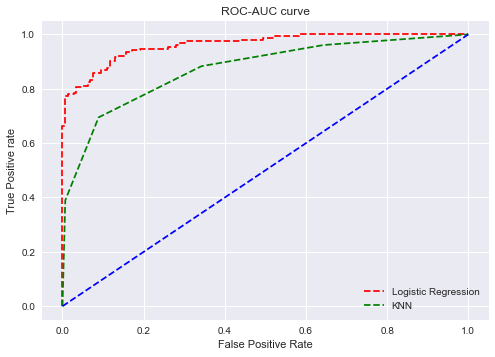

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_logistic, tpr_logistic, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr_kN_model, tpr_kN_model, linestyle='--',color='green', label='KNN')
plt.plot(probability_false_positive, probability_true_positive, linestyle='--', color='blue')

# set the title
plt.title('ROC-AUC curve')

# title for x label
plt.xlabel('False Positive Rate')

# title for y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();